<a href="https://colab.research.google.com/github/SLaksh/Python/blob/main/TextAnalyticsWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import spacy
# spaCy is a free open-source library for Natural Language Processing in Python. It features NER, POS tagging, dependency parsing, word vectors and more.
import numpy as np
# NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more
import pandas as pd
# Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data


nlp = spacy.load("en_core_web_sm")

In [ ]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence

'The brown fox is quick and he is jumping over the lazy dog'

In [ ]:
words = sentence.split()
np.random.shuffle(words)
print(words)

['quick', 'lazy', 'the', 'and', 'dog', 'brown', 'jumping', 'he', 'The', 'over', 'fox', 'is', 'is']


In [ ]:
from nltk import pos_tag
from nltk import RegexpParser
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
token_tags = pos_tag(sentence.split())
pd.DataFrame(token_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [ ]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN


In [ ]:
grammar = '''
 NP: {<DT>?<JJ>?<NN.*>}
 ADJP: {<JJ>}
 ADVP: {<RB.*>}
 PP: {<IN>}
 VP: {<MD>?<VB.*>+}
 '''
pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


In [ ]:
nltk.download('maxent_treebank_pos_tagger')
nltk.download('treebank')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.2 MB/s 


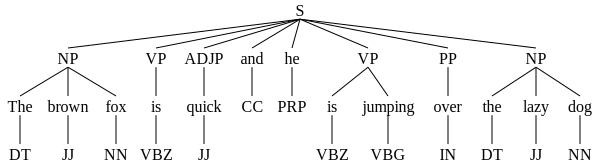

In [ ]:
# visualize shallow parse tree
!pip install svgling
shallow_parsed_sent


In [ ]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

In [ ]:
# load the Brown Corpus
import nltk
nltk.download('brown')

# total categories
print('Total Categories:', len(brown.categories()))

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


NameError: ignored

In [ ]:
# print the categories
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [ ]:
# tokenized sentences
brown.sents(categories='mystery')

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

In [ ]:
# POS tagged sentences
brown.tagged_sents(categories='mystery')

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]

In [ ]:
# get sentences in natural form
sentences = brown.sents(categories='mystery')
sentences = [' '.join(sentence_token) for sentence_token in sentences]
sentences[0:5] # viewing the first 5 sentences

['There were thirty-eight patients on the bus the morning I left for Hanover , most of them disturbed and hallucinating .',
 'An interne , a nurse and two attendants were in charge of us .',
 "I felt lonely and depressed as I stared out the bus window at Chicago's grim , dirty West Side .",
 'It seemed incredible , as I listened to the monotonous drone of voices and smelled the fetid odors coming from the patients , that technically I was a ward of the state of Illinois , going to a hospital for the mentally ill .',
 'I suddenly thought of Mary Jane Brennan , the way her pretty eyes could flash with anger , her quiet competence , the gentleness and sweetness that lay just beneath the surface of her defenses .']

In [ ]:
# get tagged words
tagged_words = brown.tagged_words(categories='mystery')

# get nouns from tagged words
nouns = [(word, tag) for word, tag in tagged_words if any(noun_tag in tag for noun_tag in ['NP', 'NN'])]

nouns[0:10] # view the first 10 nouns

[('patients', 'NNS'),
 ('bus', 'NN'),
 ('morning', 'NN'),
 ('Hanover', 'NP'),
 ('interne', 'NN'),
 ('nurse', 'NN'),
 ('attendants', 'NNS'),
 ('charge', 'NN'),
 ('bus', 'NN'),
 ('window', 'NN')]

In [ ]:
# build frequency distribution for nouns
nouns_freq = nltk.FreqDist([word for word, tag in nouns])

# view top 10 occuring nouns
nouns_freq.most_common(10)

[('man', 106),
 ('time', 82),
 ('door', 80),
 ('car', 69),
 ('room', 65),
 ('Mr.', 63),
 ('way', 61),
 ('office', 50),
 ('eyes', 48),
 ('hand', 46)]